In [1]:
import spacy
nlp = spacy.blank('id')
import gensim
import pandas as pd
import nltk
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_excel("pemilu.xlsx")
df.head()

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif


In [3]:
import re
import string
nltk.download('punkt')

komentar = df['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

df['komentar'] = komentar
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,"[oke, pak, boss]",2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,"[jangan, dusta]",2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,"[probowo, is, the, winner, of, pemilu]",2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,"[ilmu, padi]",2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,"[hidup, pak, prabowo]",2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,"[salam, jari]",2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"[jujur, ketika, ane, membuka, surat, suara, ta...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,"[bapak, jokowi, kami, semua, rakyat, ingin, ba...",2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"[tanda, alam, pemilu, day, on, juli, hasil, je...",2014-07-09 03:26:36,positif


In [4]:
df = df[df.komentar.astype(bool)]

X_temp = df['komentar']
y = df['label']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from gensim.models.fasttext import FastText
model = FastText.load_fasttext_format('../../../cc.id.300.bin')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [8]:
from MeanVectorizer import MeanEmbeddingVectorizer
mean_vec_tr = MeanEmbeddingVectorizer(model)

In [9]:
X_train_vector = mean_vec_tr.transform(X_train)
X_test_vector = mean_vec_tr.transform(X_test)

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

In [11]:
lc=preprocessing.LabelEncoder()
lc.fit(y)

LabelEncoder()

In [12]:
y_train_enc=lc.transform(y_train)
y_test_enc=lc.transform(y_test)

In [13]:
weights = y_train_enc
weights = np.choose(weights, [1, 2.4, 0.1])

train=xgb.DMatrix(X_train_vector,label=y_train_enc, weight=weights)
test=xgb.DMatrix(X_test_vector,label=y_test_enc)

print("\nIni Weights\n", weights, "\n")
print("Ini y_train_encode\n", y_train_enc, "\n")


Ini Weights
 [0.1 0.1 0.1 ... 0.1 0.1 0.1] 

Ini y_train_encode
 [2 2 2 ... 2 2 2] 



In [14]:
param = {}

# Learning Rate:  0.01
# Gamma:  0.3
# Max Depth:  7
# Subsample:  0.4
# Colsample Bytree:  0.6
# Alpha:  0
# Lamda:  1.5
# Min Child Weight:  1
# Number of Trees:  1000
    
param['num_class']=len(set(y))
param['objective'] = 'multi:softmax'
param['learning_rate'] = 0.01
param['gamma'] = 0.3
param['max_depth'] = 7
param['subsample'] = 0.4
param['colsample_bytree'] = 0.6
param['reg_alpha'] = 0
param['reg_lambda'] = 1.5
param['min_child_weight'] = 1
num_round = 1000

# param['num_class']=len(set(y))
# param['learning_rate'] = 0.001
# param['max_depth'] = 7
# param['min_child_weight'] = 10
# param['gamma'] = 2
# param['reg_alpha'] = 0.9
# param['reg_lambda'] = 4
# param['subsample'] = 0.7
# param['colsample_bytree'] = 1
# param['objective'] = 'multi:softmax'
# param['scale_pos_weight'] = 1

watchlist = [(train, 'train'), (test, 'test')]
# num_round = 100
bst = xgb.train(param, train, num_round, watchlist)

[0]	train-merror:0.39918	test-merror:0.35030
[1]	train-merror:0.30770	test-merror:0.29491
[2]	train-merror:0.31054	test-merror:0.24850
[3]	train-merror:0.28632	test-merror:0.22605
[4]	train-merror:0.25021	test-merror:0.21856
[5]	train-merror:0.22869	test-merror:0.19611
[6]	train-merror:0.23634	test-merror:0.20359
[7]	train-merror:0.21170	test-merror:0.18862
[8]	train-merror:0.20207	test-merror:0.17665
[9]	train-merror:0.19343	test-merror:0.15868
[10]	train-merror:0.15378	test-merror:0.15719
[11]	train-merror:0.15803	test-merror:0.16168
[12]	train-merror:0.15109	test-merror:0.16018
[13]	train-merror:0.15831	test-merror:0.16617
[14]	train-merror:0.16001	test-merror:0.16916
[15]	train-merror:0.15421	test-merror:0.15719
[16]	train-merror:0.14245	test-merror:0.16168
[17]	train-merror:0.14628	test-merror:0.15569
[18]	train-merror:0.13396	test-merror:0.15569
[19]	train-merror:0.14925	test-merror:0.16018
[20]	train-merror:0.14755	test-merror:0.15120
[21]	train-merror:0.14797	test-merror:0.1512

[177]	train-merror:0.05197	test-merror:0.14072
[178]	train-merror:0.05055	test-merror:0.14222
[179]	train-merror:0.04942	test-merror:0.14222
[180]	train-merror:0.04928	test-merror:0.14371
[181]	train-merror:0.04772	test-merror:0.14671
[182]	train-merror:0.04786	test-merror:0.14671
[183]	train-merror:0.04758	test-merror:0.14970
[184]	train-merror:0.04772	test-merror:0.14521
[185]	train-merror:0.04786	test-merror:0.14820
[186]	train-merror:0.04800	test-merror:0.14820
[187]	train-merror:0.04630	test-merror:0.14371
[188]	train-merror:0.04786	test-merror:0.14371
[189]	train-merror:0.04928	test-merror:0.14371
[190]	train-merror:0.04928	test-merror:0.14521
[191]	train-merror:0.04914	test-merror:0.14521
[192]	train-merror:0.04914	test-merror:0.14521
[193]	train-merror:0.04914	test-merror:0.14371
[194]	train-merror:0.04786	test-merror:0.14671
[195]	train-merror:0.04786	test-merror:0.14521
[196]	train-merror:0.04829	test-merror:0.14371
[197]	train-merror:0.04687	test-merror:0.14521
[198]	train-m

[352]	train-merror:0.03158	test-merror:0.14072
[353]	train-merror:0.03144	test-merror:0.14072
[354]	train-merror:0.03129	test-merror:0.14072
[355]	train-merror:0.02974	test-merror:0.14072
[356]	train-merror:0.02988	test-merror:0.14072
[357]	train-merror:0.02988	test-merror:0.14072
[358]	train-merror:0.03002	test-merror:0.14072
[359]	train-merror:0.02974	test-merror:0.14072
[360]	train-merror:0.02974	test-merror:0.14222
[361]	train-merror:0.02959	test-merror:0.14222
[362]	train-merror:0.02959	test-merror:0.14222
[363]	train-merror:0.02959	test-merror:0.14222
[364]	train-merror:0.02974	test-merror:0.14371
[365]	train-merror:0.02974	test-merror:0.14222
[366]	train-merror:0.02959	test-merror:0.14222
[367]	train-merror:0.02945	test-merror:0.14371
[368]	train-merror:0.02931	test-merror:0.14371
[369]	train-merror:0.02790	test-merror:0.14521
[370]	train-merror:0.02775	test-merror:0.14521
[371]	train-merror:0.02775	test-merror:0.14371
[372]	train-merror:0.02775	test-merror:0.14371
[373]	train-m

[527]	train-merror:0.02407	test-merror:0.14371
[528]	train-merror:0.02407	test-merror:0.14371
[529]	train-merror:0.02407	test-merror:0.14371
[530]	train-merror:0.02407	test-merror:0.14371
[531]	train-merror:0.02393	test-merror:0.14222
[532]	train-merror:0.02393	test-merror:0.14222
[533]	train-merror:0.02393	test-merror:0.14222
[534]	train-merror:0.02407	test-merror:0.14222
[535]	train-merror:0.02407	test-merror:0.14222
[536]	train-merror:0.02393	test-merror:0.14222
[537]	train-merror:0.02407	test-merror:0.14072
[538]	train-merror:0.02393	test-merror:0.14072
[539]	train-merror:0.02393	test-merror:0.14072
[540]	train-merror:0.02393	test-merror:0.14072
[541]	train-merror:0.02379	test-merror:0.14072
[542]	train-merror:0.02393	test-merror:0.13922
[543]	train-merror:0.02379	test-merror:0.14072
[544]	train-merror:0.02379	test-merror:0.14072
[545]	train-merror:0.02393	test-merror:0.14222
[546]	train-merror:0.02407	test-merror:0.14072
[547]	train-merror:0.02407	test-merror:0.14072
[548]	train-m

[702]	train-merror:0.01827	test-merror:0.14222
[703]	train-merror:0.01827	test-merror:0.14371
[704]	train-merror:0.01827	test-merror:0.14371
[705]	train-merror:0.01827	test-merror:0.14222
[706]	train-merror:0.01827	test-merror:0.14222
[707]	train-merror:0.01827	test-merror:0.14222
[708]	train-merror:0.01827	test-merror:0.14222
[709]	train-merror:0.01827	test-merror:0.14222
[710]	train-merror:0.01827	test-merror:0.14222
[711]	train-merror:0.01827	test-merror:0.14072
[712]	train-merror:0.01827	test-merror:0.14072
[713]	train-merror:0.01827	test-merror:0.14072
[714]	train-merror:0.01827	test-merror:0.14072
[715]	train-merror:0.01827	test-merror:0.14072
[716]	train-merror:0.01827	test-merror:0.14222
[717]	train-merror:0.01827	test-merror:0.14222
[718]	train-merror:0.01841	test-merror:0.14222
[719]	train-merror:0.01841	test-merror:0.14072
[720]	train-merror:0.01841	test-merror:0.14072
[721]	train-merror:0.01841	test-merror:0.14072
[722]	train-merror:0.01841	test-merror:0.14072
[723]	train-m

[877]	train-merror:0.01713	test-merror:0.14072
[878]	train-merror:0.01699	test-merror:0.13922
[879]	train-merror:0.01699	test-merror:0.14072
[880]	train-merror:0.01699	test-merror:0.14072
[881]	train-merror:0.01699	test-merror:0.14072
[882]	train-merror:0.01699	test-merror:0.14072
[883]	train-merror:0.01699	test-merror:0.13922
[884]	train-merror:0.01699	test-merror:0.13922
[885]	train-merror:0.01699	test-merror:0.14072
[886]	train-merror:0.01699	test-merror:0.14072
[887]	train-merror:0.01685	test-merror:0.14072
[888]	train-merror:0.01685	test-merror:0.14072
[889]	train-merror:0.01699	test-merror:0.14072
[890]	train-merror:0.01699	test-merror:0.14072
[891]	train-merror:0.01699	test-merror:0.14072
[892]	train-merror:0.01699	test-merror:0.14072
[893]	train-merror:0.01685	test-merror:0.14072
[894]	train-merror:0.01685	test-merror:0.14072
[895]	train-merror:0.01685	test-merror:0.14072
[896]	train-merror:0.01685	test-merror:0.14072
[897]	train-merror:0.01685	test-merror:0.14072
[898]	train-m

In [15]:
pred = bst.predict(test)
pred2 = bst.predict(train)

In [16]:
predictions = lc.inverse_transform(list(map(int,pred)))
predictions2 = lc.inverse_transform(list(map(int,pred2)))

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

test_score = accuracy_score(predictions,y_test)
train_score = accuracy_score(predictions2, y_train)

print("\nTest Score\n", test_score, "\n")
print("Train Score\n", train_score, "\n")
print("CONFUSSION MATRIX\n", confusion_matrix(y_test, predictions), "\n")
print("CLASSIFICATION REPORT\n", classification_report(y_test, predictions), "\n")


Test Score
 0.8622754491017964 

Train Score
 0.9835267690003744 

CONFUSSION MATRIX
 [[ 18   0  48]
 [  4   0  18]
 [ 20   2 558]] 

CLASSIFICATION REPORT
               precision    recall  f1-score   support

     negatif       0.43      0.27      0.33        66
      netral       0.00      0.00      0.00        22
     positif       0.89      0.96      0.93       580

    accuracy                           0.86       668
   macro avg       0.44      0.41      0.42       668
weighted avg       0.82      0.86      0.84       668
 



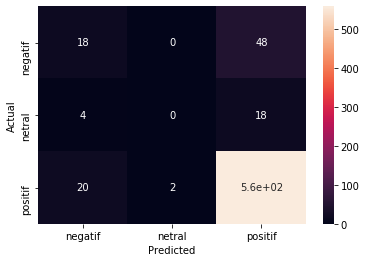

In [18]:
import seaborn as sn

confusion = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion, annot=True)

In [ ]:
# # Create XGB Classifier object
# xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "gpu_predictor", verbosity = 1, objective = "multi:softmax")

# # Create parameter grid
# # parameters = {"learning_rate": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
# #                "gamma" : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 2, 3, 4, 6],
# #                "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
# #                "colsample_bytree": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
# #                "subsample": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
# #                "reg_alpha": [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
# #                "reg_lambda": [1, 1.5, 2, 3, 4.5, 4, 5],
# #                "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
# #                "n_estimators": [100, 250, 500, 1000],
# #                "num_boost_round": [100, 250, 500, 750, 1000]}

# parameters = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 250, 500, 1000]}

# from sklearn.model_selection import RandomizedSearchCV
# # Create RandomizedSearchCV Object
# xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
#                              cv = 10, verbose = 3, random_state = 40 )
           
# # Fit the model
# model_xgboost = xgb_rscv.fit(X_train_vector, y_train)

# # Model best estimators
# print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
# print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
# print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
# print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
# print("Colsample Bytree: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
# print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
# print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
# print("Min Child Weight: ", model_xgboost.best_estimator_.get_params()["min_child_weight"])
# print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])